# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Quantile regression with KERAS

<br></font>
</div>

# Theoretical recall

<div class="alert alert-block alert-info">
<font color=black><br>

- The quantile regression loss function is applied to predict quantiles. 
- Our goal would be to monimise the function.
- A quantile is the value below which a fraction of observations in a group falls.

<br></font>
</div>

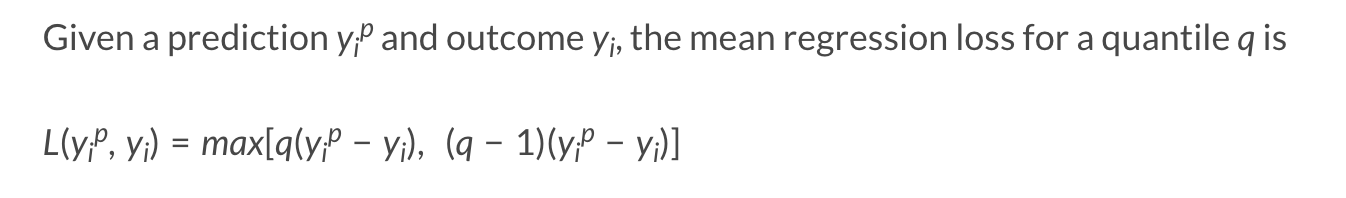

# Imort modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 6
rcParams['font.size'] = 20

# Creating a dummy noisy function

<div class="alert alert-block alert-info">
<font color=black><br>

- In our example, we will exploit the (perhaps surprising) ability of deep neural networks (DNNs) to approximate any continuous function, provided the DNN has sufficient parameters (i.e. neurons) and training data. 
- y_p is the model prediction.
- Where the last term in function __f__ represents a randomly obtained sample from a normal distribution with zero mean and 0.2 standard deviation.
- This means the function **f** has two terms: predictable and unpredictable error.
- This last term unpredictable but it **can be modeled** through quantile regression.

<br></font>
</div>

In [2]:
def f_predictable(x):
    return x + np.sin(np.pi * x/2)

In [3]:
def f(x, std=0.2):
    # predictable + unpredictable terms
    return f_predictable(x) + np.random.randn(len(x)) * std 

In [4]:
def get_data(num, start=0, end=4):
        x = np.sort(np.random.rand(num) * (end - start) + start)
        y = f(x)
        return x.reshape(-1, 1), y

In [5]:
x_train, y_train = get_data(num=20000)
x_test, y_test = get_data(num=1000)

In [6]:
def quantile_loss(q, y_p, y):
        e = y_p - y
        return tf.keras.backend.mean(tf.keras.backend.maximum(q*e, (q-1)*e))

# Building the ANN

<div class="alert alert-block alert-info">
<font color=black><br>

- 3 fully connected hidden layers, each with one hundred neurons.
- The last layer is linear beacause we have a regression model.
- The lambda function is used to input the quantile value to the quantile regression loss function. Keras only allows two inputs in user-defined loss functions, predictions and actual values.
- We run the code three ties to get the prediction interval for each of the test points. The reason for the choice of this values is explained later.

<br></font>
</div>

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu', input_dim=1))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))
# The lambda function is used to input the quantile value to the quantile
# regression loss function. Keras only allows two inputs in user-defined loss
# functions, predictions and actual values.
quantiles = [0.023, 0.5, 0.977]
predictions = []
for q in quantiles:
    model.compile(optimizer='adam', loss=lambda y_p, y: quantile_loss(q, y_p, y))
    model.fit(x_train, y_train, epochs=20)
    prediction = model.predict(x_test)
    predictions.append(prediction)
    

Epoch 1/20
625/625 [==============================] - 1s 1ms/step - loss: 0.0212
Epoch 2/20
625/625 [==============================] - 1s 1ms/step - loss: 0.0180
Epoch 3/20
625/625 [==============================] - 1s 1ms/step - loss: 0.0162
Epoch 4/20
625/625 [==============================] - 1s 1ms/step - loss: 0.0150
Epoch 5/20
625/625 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 6/20
625/625 [==============================] - 1s 1ms/step - loss: 0.0137
Epoch 7/20
625/625 [==============================] - 1s 1ms/step - loss: 0.0129
Epoch 8/20
625/625 [==============================] - 1s 1ms/step - loss: 0.0126
Epoch 9/20
625/625 [==============================] - 1s 1ms/step - loss: 0.0124
Epoch 10/20
625/625 [==============================] - 1s 1ms/step - loss: 0.0124
Epoch 11/20
625/625 [==============================] - 1s 1ms/step - loss: 0.0121
Epoch 12/20
625/625 [==============================] - 1s 1ms/step - loss: 0.0127
Epoch 13/20
625/625 [====

In [8]:
type(prediction)

numpy.ndarray

# Post-processing

<div class="alert alert-block alert-info">
<font color=black><br>

- The **q=0.5** prediction is an accurate approximation of the predictable terms in the x − y relationship.
- This is not surprising as the median does not get affected by a normal distribution with mean (and median) of zero. 
- Mean = medianf for a symmetric distribution like the mormal distribuiton.
- The normal distribution does influence the other quantiles and approximately 95% of the instances are between the 0.023-quantile and 0.977-quantile predictions.
- If you want to know how we got the 95% figure please look at the theoretical result reported below.
- Given the properties of the normal distribution, the 0.023 and 0.977 quantiles are two standard deviations below and above the median.
- Hence, 4 standard deviations (0.8) **should** (as it may not be always like that) be the vertical distance between the 0.023 and 0.977 quantiles.
- **ATTENTION**: The table below is a guideline only. These are valid for symmetrically distributed errors. Quantile regression is capable of capturing the **heteroscedacity** of the error.

<br></font>
</div>

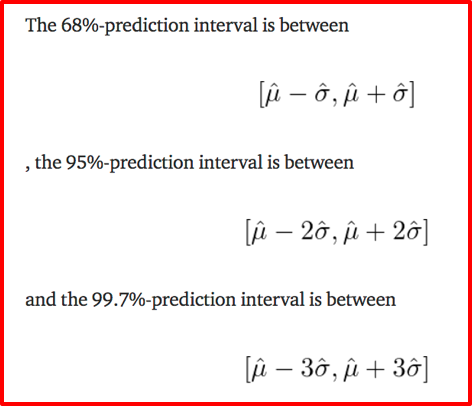

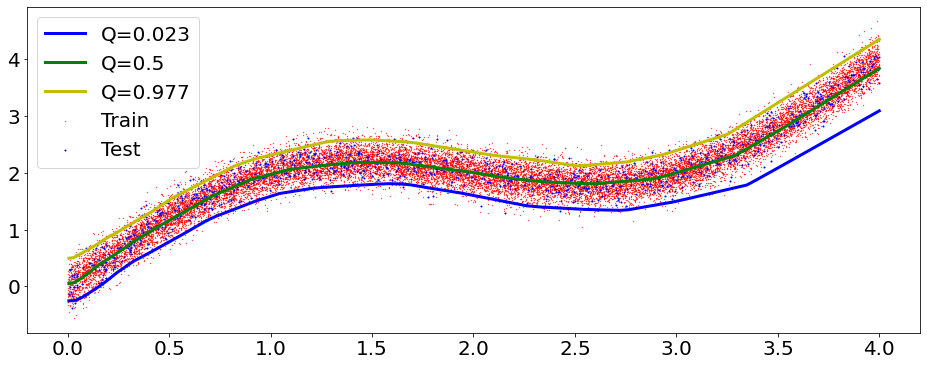

In [9]:
rcParams['figure.figsize'] = 16, 6
rcParams['font.size'] = 20
fig, ax = plt.subplots() 

ax.scatter(x_train, y_train, s = 0.1, c = "r", label = "Train")
ax.scatter(x_test, y_test, s = 1, c = "b", label = "Test")
colours = ["b", "g", "y"]
for i,q in enumerate(quantiles):    
    ax.plot(x_test, predictions[i], lw = 3, c = colours[i], label = "Q="+ str(q))
           
ax.legend()
plt.show()

# References

<div class="alert alert-block alert-warning">
<font color=black><br>

- https://www.evergreeninnovations.co/blog-quantile-loss-function-for-machine-learning<br>
- https://www.wikiwand.com/en/Quantile_regression<br>

<br></font>
</div>

# Conclusion

<div class="alert alert-block alert-danger">
<font color=black><br>

- Increasing the prediction accuracy is as simple as adding more neurons and more instances for training, provided you have the patience and computational power! 

<br></font>
</div>